In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **TASK 1**

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/quantum/QVI_purchase_behaviour .csv')
d=pd.read_excel('/content/drive/MyDrive/quantum/QVI_transaction_data .xlsx')
df2=pd.read_csv('/content/drive/MyDrive/quantum/QVI_data.csv')

In [ ]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
d.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:

# Convert Excel serial dates to datetime
base_date = pd.Timestamp('1900-01-01')
d['DATE'] = base_date + pd.to_timedelta(d['DATE'], unit='D')

d.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
import re

In [ ]:
# Define a function to remove the weight information
def remove_weight(product_name):
    # Use regular expressions to remove the weight (digits followed by 'g') at the end
    return re.sub(r'\d+g$', '', product_name)

# Apply the function to the 'Product Name' column
d['PROD_NAME'] = d['PROD_NAME'].apply(remove_weight)
d

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana,2,8.8
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
d["PROD_QTY"].unique()

array([  2,   3,   5,   1,   4, 200])

In [ ]:
df["LIFESTAGE"].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [ ]:
df["PREMIUM_CUSTOMER"].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [ ]:
d.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [ ]:
d.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [ ]:
df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [ ]:
df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
d.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

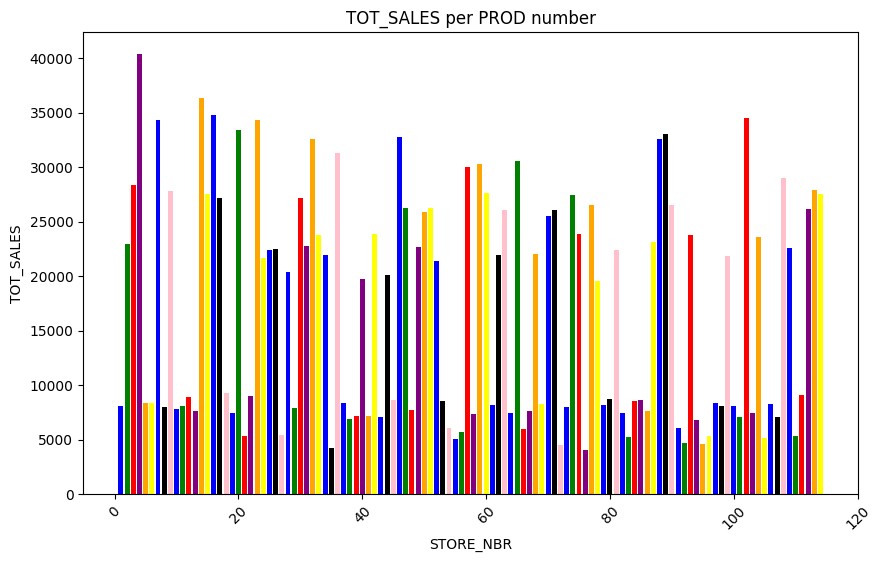

In [ ]:
import matplotlib.pyplot as plt
# Group by 'job_industry_category' and count the number of customers in each category
grouped = d.groupby('PROD_NBR')['TOT_SALES'].sum().reset_index()

colors = ['blue', 'green', 'red', 'purple', 'orange','yellow','blue','black','pink']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars=plt.bar(grouped['PROD_NBR'], grouped['TOT_SALES'],color=colors)
plt.xlabel('STORE_NBR')
plt.ylabel('TOT_SALES')
plt.title('TOT_SALES per PROD number')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
result_inner = pd.merge(d, df, on='LYLTY_CARD_NBR', how='inner')
result_inner

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-12,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-11,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium


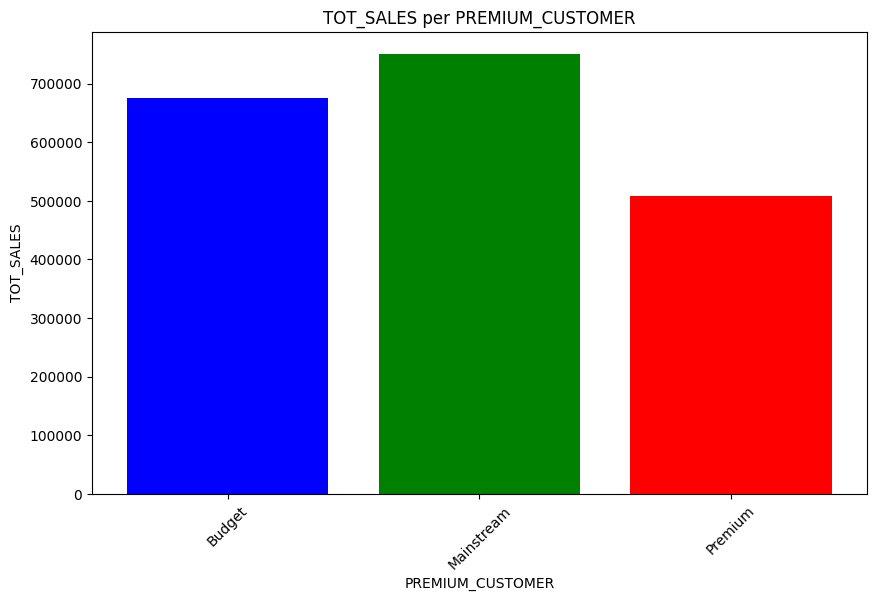

In [ ]:
grouped = result_inner.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()

colors = ['blue', 'green', 'red', 'purple', 'orange','yellow','blue','black','pink']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars=plt.bar(grouped['PREMIUM_CUSTOMER'], grouped['TOT_SALES'],color=colors)
plt.xlabel('PREMIUM_CUSTOMER')
plt.ylabel('TOT_SALES')
plt.title('TOT_SALES per PREMIUM_CUSTOMER')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

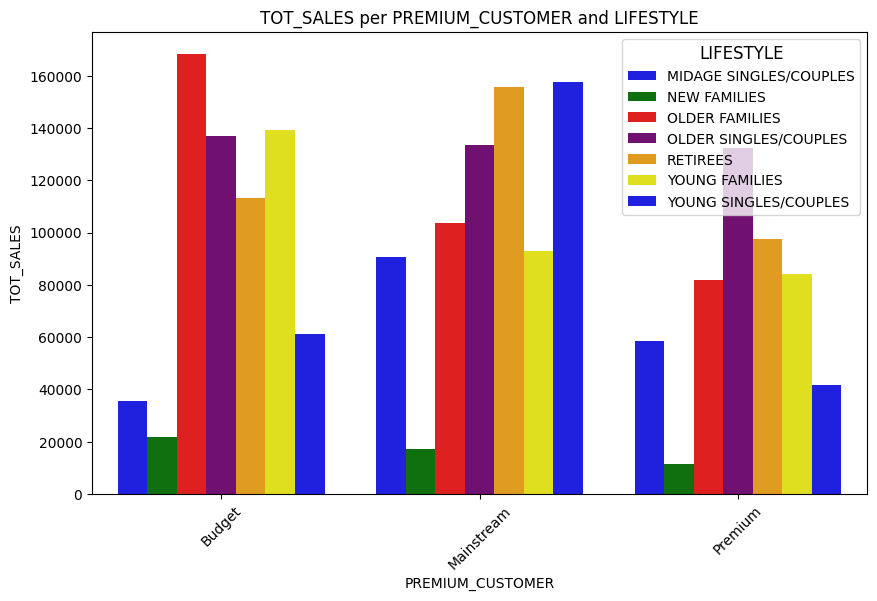

In [ ]:
grouped = result_inner.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum().reset_index()

colors = ['blue', 'green', 'red', 'purple', 'orange','yellow','blue','black','pink']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', hue='LIFESTAGE', data=grouped, palette=colors)
plt.xlabel('PREMIUM_CUSTOMER')
plt.ylabel('TOT_SALES')
plt.title('TOT_SALES per PREMIUM_CUSTOMER and LIFESTYLE')
plt.xticks(rotation=45)
plt.legend(title='LIFESTYLE', title_fontsize='12')  # Add a legend
plt.show()

In [ ]:
 result_inner.corr()


<ipython-input-60-d5d6dada4f8d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result_inner.corr()


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,1.000000,0.950869,0.997593,0.002309,0.005295,0.003234
LYLTY_CARD_NBR,0.950869,1.000000,0.954919,0.001755,0.003834,0.002908
TXN_ID,0.997593,0.954919,1.000000,0.002544,0.005343,0.003468
PROD_NBR,0.002309,0.001755,0.002544,1.000000,-0.004813,-0.133851
PROD_QTY,0.005295,0.003834,0.005343,-0.004813,1.000000,0.715307
TOT_SALES,0.003234,0.002908,0.003468,-0.133851,0.715307,1.000000


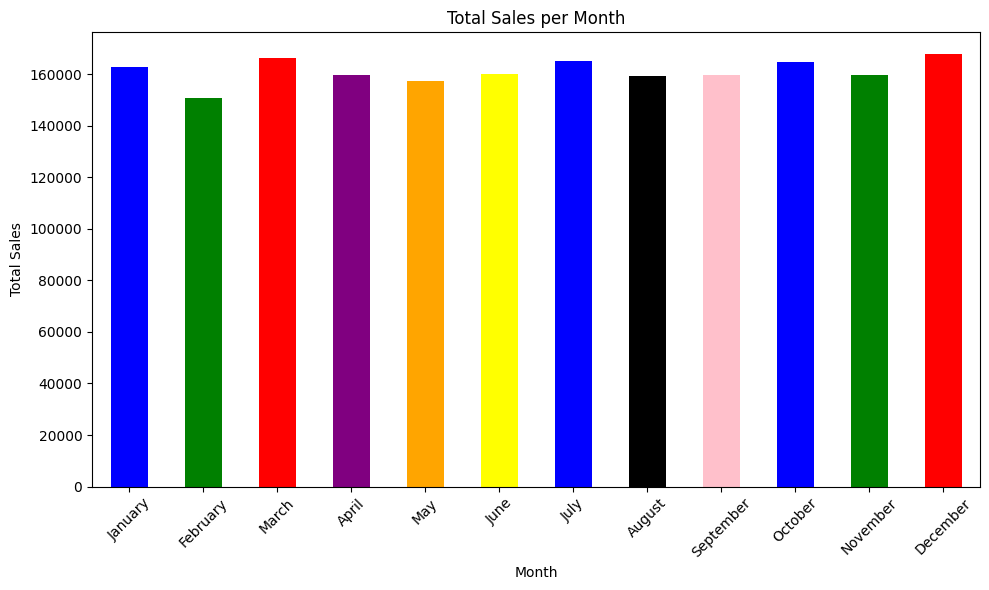

In [ ]:
result_inner['DATE'] = pd.to_datetime(result_inner['DATE'])
# Extract year and month from the 'DATE' column

result_inner['MONTH'] = result_inner['DATE'].dt.month
colors = ['blue', 'green', 'red', 'purple', 'orange','yellow','blue','black','pink']
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Group by month and calculate the total sales
monthly_sales = result_inner.groupby('MONTH')['TOT_SALES'].sum()

# Rename the index to use month names
monthly_sales.index = monthly_sales.index.map(month_names)

# Create a bar chart to visualize total sales per month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar',color=colors)
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **TASK 2**

In [ ]:
df2.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
grouped = df2.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()

all=pd.DataFrame(grouped)
all

,STORE_NBR,TOT_SALES
0,1,2393.60
1,2,2005.80
2,3,12802.45
3,4,14647.65
4,5,9500.80
...,...,...
267,268,2601.05
268,269,11221.80
269,270,11293.95
270,271,9721.80


In [ ]:
all.describe()

,STORE_NBR,TOT_SALES
count,272.000000,272.000000
mean,136.500000,7107.040441
std,78.663842,4705.862960
min,1.000000,5.200000
25%,68.750000,2899.425000
50%,136.500000,5972.625000
75%,204.250000,10952.775000
max,272.000000,17605.450000


In [ ]:
# Calculate the Pearson correlation coefficient
corr_coefficient = all['STORE_NBR'].corr(all['TOT_SALES'])
corr_coefficient

-0.026517684930570374

In [ ]:

# Calculate the minimum and maximum values of TOT_SALES
min_sales = all['TOT_SALES'].min()
max_sales = all['TOT_SALES'].max()

# Calculate the normalized score for each row
all['Normalized_Score'] = 1 - (all['TOT_SALES'] - min_sales) / (max_sales - min_sales)

all

,STORE_NBR,TOT_SALES,Normalized_Score
0,1,2393.60,0.864297
1,2,2005.80,0.886331
2,3,12802.45,0.272894
3,4,14647.65,0.168054
4,5,9500.80,0.460485
...,...,...,...
267,268,2601.05,0.852511
268,269,11221.80,0.362702
269,270,11293.95,0.358603
270,271,9721.80,0.447928


In [ ]:
max = all['Normalized_Score'].max()

In [ ]:
grouped = all.groupby('STORE_NBR')['Normalized_Score']

colors = ['blue', 'green', 'red', 'purple', 'orange','yellow','blue','black','pink']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars=plt.bar(all['STORE_NBR'],all['Normalized_Score'], color=colors)
plt.xlabel('STORE_NBR')
plt.ylabel('TOT_SALES')
plt.title('TOT_SALES per STORE_NBR')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
stores_to_display=[88,86,77]

In [ ]:

# Filter the DataFrame to include only the specified stores
fd = df2[df2['STORE_NBR'].isin(stores_to_display)]
fd

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [ ]:
store=[12,34,65]
fr = df2[df2['STORE_NBR'].isin(store)]
fr

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,...,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
10280,12000,2019-05-20,12,10510,62,...,18.5,134,PRINGLES,MIDAGE SINGLES/COUPLES,Mainstream
10281,12000,2019-01-04,12,10509,63,...,8.4,135,KETTLE,MIDAGE SINGLES/COUPLES,Mainstream
10282,12001,2018-07-25,12,10511,28,...,6.6,175,THINS,YOUNG SINGLES/COUPLES,Mainstream
10283,12001,2019-04-01,12,10512,47,...,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Mainstream
10284,12001,2019-05-05,12,10513,47,...,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...
61910,65380,2018-12-11,65,63227,74,...,8.8,175,TOSTITOS,YOUNG FAMILIES,Budget
61911,65380,2018-12-19,65,63228,23,...,11.4,330,CHEEZELS,YOUNG FAMILIES,Budget
61912,65380,2019-02-28,65,63229,87,...,7.6,110,INFUZIONS,YOUNG FAMILIES,Budget
61913,65380,2019-03-29,65,63230,62,...,7.4,134,PRINGLES,YOUNG FAMILIES,Budget


In [ ]:
# Sum all the total sales in the DataFrame
total_sales = fd['TOT_SALES'].sum()
print("total sales revenue is ",total_sales)

total sales revenue is  30008.600000000002


In [ ]:
# Sum all the total sales in the DataFrame
total_sales = fr['TOT_SALES'].sum()
print("total sales revenue is ",total_sales)

total sales revenue is  22291.149999999998


In [ ]:
tnc=fd.shape[0]
print("total number of customers is ",tnc)

total number of customers is  3974


In [ ]:
tncé=fr.shape[0]
print("total number of customers is ",tncé)

total number of customers is  2602


In [ ]:

grouped = fd.groupby('LYLTY_CARD_NBR')['TOT_SALES'].mean().reset_index()

s=pd.DataFrame(grouped)
s

,LYLTY_CARD_NBR,TOT_SALES
0,77000,5.7
1,77001,10.3
2,77002,4.7
3,77003,3.0
4,77004,7.6
...,...,...
1012,2370651,13.0
1013,2370701,7.2
1014,2370751,9.2
1015,2370961,9.3


In [ ]:

grouped = fd.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()

s=pd.DataFrame(grouped)
s

,STORE_NBR,TOT_SALES
0,77,3040.00
1,86,10635.35
2,88,16333.25


In [ ]:
# Calculate the Pearson correlation coefficient
corr_coefficient = fd['STORE_NBR'].corr(s['TOT_SALES'])

In [ ]:
corr_coefficient

nan